![alt text](29984_guerrilla-girls.jpg "Title")

El presente trabajo tratará de poner en vigencia una de las principales reinvidicaciones que realizaron y que siguen ejerciendo el colectivo Guerrilla Girl.

Este colectivo (https://www.guerrillagirls.com/) surgió en 1985 en respuesta a una exposición que se realizó en el MoMa, en la cual se presentó una exposición con los artistas mas importantes del siglo XX y no participaba ninguna mujer.

![alt text](mujeresmuseo.jpeg "mujeres museo")

Una de las reinvindicaciones por las cuales surgió y que perdura en la actualidad es el bajo número de mujeres artistas que se encuentran en los museos.
En este trabajo se va a intentar verificar si las reinvindicación de que solamente un 5% de las artistas en el MoMa son mujeres y si esta lucha por parte de este colectivo ha tenido una influencia en el mundo de los museos de arte.
Por ello en un primer momento tomaremos desde la base de datos del museo, los  artistas y obras que se encuentran en su catálogo, en esto es bueno señalar que en exposición se suele tener un número de obras pero en los almacenes 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 

color = sns.color_palette()

%matplotlib inline

In [2]:
#funciones para abrir los documentos
def abrirdoc(nombre,csv):
    nombre = pd.read_csv(csv)
    return nombre

In [3]:
artista = abrirdoc("artista",'artists.csv')
obras= abrirdoc("obras",'artworks.csv')

In [4]:
#renombramos las columnas que posteriormente nos pueden dar fallo.
def rename(df,col1,coln):
    df=df.rename(columns={col1:coln})
    return df



In [5]:
#usando la función cambiamos el nombre a la columna "Artist ID"
obras = rename(obras,"Artist ID",'Artist_ID')
artista = rename(artista,"Artist ID",'Artist_ID')

In [6]:
#vemos como es la informacion 
print(artista.info())
print(obras.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15091 entries, 0 to 15090
Data columns (total 6 columns):
Artist_ID      15091 non-null int64
Name           15091 non-null object
Nationality    12603 non-null object
Gender         12019 non-null object
Birth Year     11237 non-null float64
Death Year     4579 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 707.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130262 entries, 0 to 130261
Data columns (total 21 columns):
Artwork ID            130262 non-null int64
Title                 130210 non-null object
Artist_ID             128802 non-null object
Name                  128802 non-null object
Date                  127950 non-null object
Medium                118343 non-null object
Dimensions            118799 non-null object
Acquisition Date      124799 non-null object
Credit                127192 non-null object
Catalogue             130262 non-null object
Department            130262 non-null obj

In [7]:
#limpiamos la variable Artist_ID 
def limpiaArtisobras(obras):
    obras['Artist_ID'] = obras['Artist_ID'].fillna(0)
    lista=[]
    for a in obras['Artist_ID']:
        if len(list(str(a).split(','))) >= 2:
            lista.append(0)
        else:
            lista.append(a)
    obras=obras.assign(Artist_ID=lista)
    obras['Artist_ID'] = obras["Artist_ID"].astype(int)
    return obras

In [8]:
#la aplicamos a la base de datos de obras
obras = limpiaArtisobras(obras)

In [9]:
#unimos las bases de datos mediante la columna que seleccionemos
def merge(nombre,primerdf,segundodf,columna):
    nombre = pd.merge(primerdf, segundodf, on=columna,how='inner')
    return nombre

In [10]:
#unimos las bases de datos artista y obras en la nueva base "moma" mediante la columna "Artist_ID"
moma = merge("moma",artista,obras,'Artist_ID')

In [11]:
#limpiamos variable genero y calculamos % del genero de los artistas
def Genero_autores(moma):
    moma['Gender'] = moma['Gender'].str.replace('male', 'Male')
    moma['Gender'] = moma['Gender'].str.replace('FeMale', 'Female')
    moma['Gender'] = moma['Gender'].fillna('Unknown')
    Unknown=(moma[(moma["Gender"]=="Unknown")]["Gender"].value_counts()/len(moma["Gender"])*100)
    Unknown="% .2f" %Unknown[0]
    Male=(moma[(moma["Gender"]=="Male")]["Gender"].value_counts()/len(moma["Gender"])*100)
    Male="% .2f"%Male[0]
    Female=(moma[(moma["Gender"]=="Female")]["Gender"].value_counts()/len(moma["Gender"])*100)
    Female="% .2f"%Female[0]
    porcentaje= {"Unknown":[Unknown],"Male":[Male],"Female":[Female]}
    Total=pd.DataFrame(data=porcentaje,).T
    Total2=Total.rename(columns={0:'%Gender_authors'})
    return Total2

In [12]:
Genero_autores(moma)

,%Gender_authors
Female,13.23
Male,81.70
Unknown,5.06


In [13]:
#ahora sin contabilizar los desconocidos
def genero_autoressindesc(moma):
    GenderList = [x for x in moma["Gender"] if str(x) != 'Unknown']
    z = pd.DataFrame(GenderList)
    Malez=(z[(z[0]=="Male")][0].value_counts()/len(z[0])*100)
    Malez="% .2f"%Malez[0]
    Femalez=(z[(z[0]=="Female")][0].value_counts()/len(z[0])*100)
    Femalez="% .2f"%Femalez[0]
    porcentajez= {"Male":[Malez],"Female":[Femalez]}
    Totalz=pd.DataFrame(data=porcentajez).T
    Total2z=Totalz.rename(columns={0:'%Gender_authors'})
    return Total2z

In [14]:
genero_autoressindesc(moma)

,%Gender_authors
Female,13.94
Male,86.06


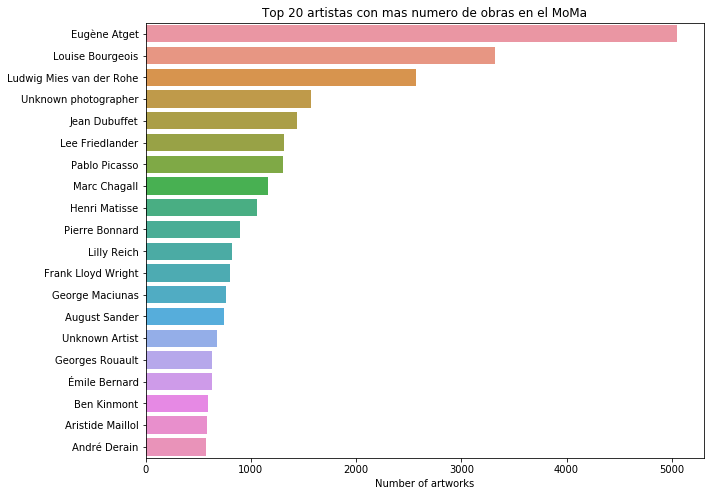

In [15]:
def plot_val_counts(df,column='Name_x',figsize=(10,8),title=None):
    counts = df[column].value_counts()[:20]
    plt.figure(figsize=figsize)
    sns.barplot(counts.values,counts.index)
    plt.xlabel(column)
    plt.xlabel('Number of artworks')
    plt.xticks(rotation=0)
    plt.title(title)
    plt.show()

plot_val_counts(moma,title='Top 20 artistas con mas numero de obras en el MoMa')

In [34]:
#funcion para conocer los artistas por el género
def obrasartista(Genero):
    obrasgenero= moma[moma['Gender'] == Genero]
    return (obrasgenero.Name_x.value_counts())

print(obrasartista("Female"))



Louise Bourgeois             3318
Lilly Reich                   823
Dorothea Lange                488
Anni Albers                   197
Aleksandra Mir                175
Kiki Smith                    162
Frances Benjamin Johnston     158
Lauretta Vinciarelli          124
Natalia Goncharova            116
Sherrie Levine                103
Cindy Sherman                 103
Ilse Bing                     101
Elizabeth Murray               98
Mieko Shiomi                   97
Rosemarie Trockel              96
Doris Ulmann                   95
Helen Levitt                   89
Fiona Banner                   89
Gertrude Käsebier              87
Ree Morton                     84
Ellen Gallagher                83
Diane Arbus                    83
Kara Walker                    82
VALIE EXPORT                   79
Jan Groover                    79
Louise Nevelson                78
Berenice Abbott                76
Rachel Harrison                75
Judith Joy Ross                74
Eva Zeisel    

In [17]:
#funcion para conocer nacionalidad con mas obras
def nacionalidadartista(nacionalidad):
    obrasgenero= moma[moma['Nationality'] == nacionalidad]
    return (obrasgenero.Name_x.value_counts())
print(nacionalidadartista("American"))

Louise Bourgeois                  3318
Ludwig Mies van der Rohe          2566
Lee Friedlander                   1317
Frank Lloyd Wright                 799
George Maciunas                    762
Ben Kinmont                        597
Sol LeWitt                         557
Dorothea Lange                     488
Jasper Johns                       412
Jim Dine                           401
Walker Evans                       361
Garry Winogrand                    359
Jules Pascin                       350
Robert Rauschenberg                336
Josef Albers                       291
Ansel Adams                        290
Edward Steichen                    289
Robert Motherwell                  267
Leonard Baskin                     263
Edward Weston                      260
Antonio Frasconi                   257
Andy Warhol                        247
Ellsworth Kelly                    247
Harry Callahan                     247
Robert Frank                       234
Edward Ruscha            

In [18]:
#funcion para conocer por genero y nacionalidad 
def gennacartista(Genero,nacionalidad):
    obrasgenero= moma[(moma['Gender'] == Genero) & (moma['Nationality'] == nacionalidad)] 
   
    return (obrasgenero.Name_x.value_counts())

In [19]:
#lista de hombres españoles en el MoMa
gennacartista("Male","Spanish")[:30]

Pablo Picasso                     1310
Joan Miró                          462
Francisco de Goya                  181
Antoni Tàpies                      170
Antonio Saura                      114
Salvador Dalí                       77
Juan Gris                           59
Juan Hidalgo                        55
Fernando Martín Menis               33
Eduardo Chillida                    30
Rafael Canogar                      29
Julio González                      27
Luis Buñuel                         22
Juan Uslé                           21
Pablo Palazuelo                     20
Pedro Almodóvar                     18
Ricardo Bofill                      16
Ernesto Caivano                     15
Vincente Rojo                       14
Manolo (Manuel Martínez Hugué)      13
Antonio Muntadas                    13
Rafael Alberti                      12
Manuel Angeles Ortiz                10
José Pla-Narbona                     9
Chema Cobo                           9
Zush (Alberto Porta)     

In [20]:
#lista de mujeres españolas en el MoMa
gennacartista("Female","Spanish")[:30]

Cristina Iglesias    9
Susana Solano        8
Teresa Moro          5
Elena del Rivero     3
Ester Partegàs       3
Patricia Urquiola    2
Carme Pinos          1
America Sanchez      1
Riba Rovira          1
Victoria Gil         1
Oliva Perotes        1
Name: Name_x, dtype: int64

**REPERCUSIÓN DEL MOVIMIENTO**

In [21]:
#Limpieza de los nulos
def limpiezadate(moma,columna):
    moma[columna]= moma[columna].fillna("0")
    return moma
    

In [22]:
#Se quitan los nulos 
moma= limpiezadate(moma,'Acquisition Date')


In [23]:
#Expresión regular para homogeneizar el año
def nuevaadquisicion(Acquisition_Date):
    new_acquisition= re.sub("\-+\d*","",Acquisition_Date)
    return new_acquisition

In [24]:
#Se aplica la expresión 
moma['Acquisition Date']= moma["Acquisition Date"].apply(nuevaadquisicion)

In [25]:
#Se cambia el tipo para poder categorizar
moma["Acquisition Date"] = moma["Acquisition Date"].astype(int)

In [26]:
#Se crea la función para poder categorizar
def categorizacion():
    etiquetas= ['desconocido','preguerrilla','postguerrilla']
    cortes = [-1,1925,1985,2019]
    moma['Acquisition_Datenew'] = pd.cut(moma['Acquisition Date'],cortes, labels=etiquetas)
    return moma['Acquisition_Datenew']

In [27]:
#Categorizamos la columna de fecha de adquisición, entre 1925 que fue cuando se abrió el museo 
#y 1985 que surgió Guerrilla Girl
moma['Acquisition_Datenew']= categorizacion()

In [28]:
#creamos la función para verificar según la fecha
def impactoguerrilla(periodo):
    generoperiodo= moma[moma['Acquisition_Datenew'] == periodo]
    tab=genero_autoressindesc(generoperiodo)
    return tab
        

In [29]:
#tabla con el periodo desde que se creó el museo hasta 1985
impactoguerrilla("preguerrilla")

,%Gender_authors
Female,6.48
Male,93.52


In [30]:
#tabla desde 1985 hasta la actualidad 
impactoguerrilla("postguerrilla")

,%Gender_authors
Female,22.43
Male,77.57


In [31]:
#tabla en el periodo que no están bien fechados  los datos
impactoguerrilla("desconocido")

,%Gender_authors
Female,22.74
Male,77.26


**Con este estudio podemos ver como desde 1985 ha habido una mayor presencia en la colección del MoMa de artistas mujeres, siendo uno de los principales motivos el movimiento de las Guerrilla Girls**

![alt text](mascarascalle.jpeg "mujeres museo")

![alt text](asd.jpg "ads")